In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt

import numpy as np

In [2]:
num_per_cluster = 1000
stddev = 0.1
mean = 0

centers = tf.constant([[0,1], [1,0], [0,-1], [-1, 0],
                    [0.5, 0.5], [0.5, -0.5], [-0.5, -0.5], 
                    [-0.5,0.5]]) * 4

all_data = []
for idx in range(centers.shape[0]):
  center_data = tf.random.normal(shape=(num_per_cluster, 2), stddev=stddev, mean=mean + centers[idx,:], dtype=tf.float32) # generate a thousand point (x, y) around center[idx] with std = 0.1
  all_data.append(center_data)

datas = tf.concat(all_data, axis=0)

print(datas.shape)


(8000, 2)


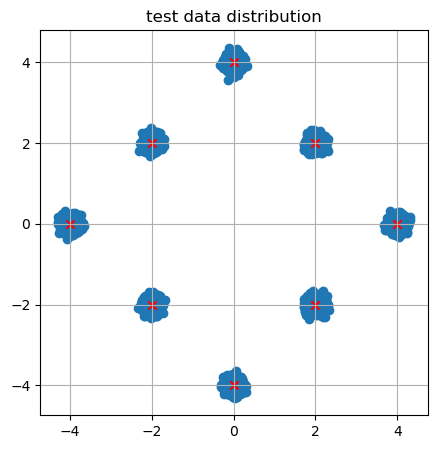

In [3]:

plt.figure(figsize=(5, 5))

plt.scatter(datas[:, 0], datas[:, 1]) # to plot all our points

for center in centers:
    plt.scatter(center[0], center[1], marker = 'x', color = 'r')

plt.title('test data distribution')
plt.grid()


In [4]:
num_diffusion_timesteps=250
beta_start=0.0001
beta_end=0.02
schedule_type='linear'

betas = np.linspace(beta_start ** 0.5, beta_end ** 0.5, num_diffusion_timesteps, dtype=np.float32) ** 2

print(betas[:10])

[9.9999997e-05 1.1083451e-04 1.2222615e-04 1.3417492e-04 1.4668083e-04
 1.5974390e-04 1.7336408e-04 1.8754142e-04 2.0227590e-04 2.1756750e-04]


##### betas schedule is basically an array of values called betas that are the standart deviation of the gaussian nois of the corresponding diffusion step. ther is multiple ways of creating bets schedule, the easiest way is a linear function. betas value increase as we get closer to the end of the process

In [11]:
# test beta schedule
beta_start = 1e-4
betas_end = 2e-2
diffusions_step = 250

beta_schedule = np.linspace(beta_start, betas_end, diffusions_step, dtype=np.float32)

print(len(beta_schedule))

250
